## Note

Before using the figures in this notebook, should think about whether it is useful to represent NVT Epot v.s. time and NVT C-C bond distance v.s. time. The NVT MD should not have osciallation properties.

## Set up environments

In [1]:
from ase.io.trajectory import TrajectoryWriter as tw
from ase.io.trajectory import TrajectoryReader as tr

import os
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid.inset_locator import InsetPosition
import seaborn as sns

from publish_format import useLargeSize

/gpfs/data/brubenst/chuang25/local/miniconda3/envs/ml/lib/python3.6/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.
  if __name__ == '__main__':


In [2]:
def extract_energy(filename, nums=-1):
    energy = []
    trajs = tr(filename)[:nums]
    for traj in trajs:
        energy.append(traj.get_potential_energy())
    return np.array(energy)


def extract_forces(filename, nums=-1):
    forces = []
    trajs = tr(filename)[:nums]
    for traj in trajs:
        forces.append(np.linalg.norm(np.array(traj.get_forces())))
    return np.array(forces)


def extract_distance(filename, atom1, atom2, nums=-1):
    distances = []
    trajs = tr(filename)[:nums]
    print(trajs[0].get_chemical_symbols())
    print("Get distance between atom {} and atom {}".format(atom1, atom2))
    for traj in trajs:
        distances.append(traj.get_distances(atom1, atom2)[0])
    return np.array(distances)

## NVE comparison between MD calculated by DFT, AMPtorch DMC (with force) and AMPtorch DMC (without force)

In [3]:
dft_file = "./MD_start_eq/dft/nve/test04/md_nve_dft.traj"
forces_dft = extract_forces(dft_file, nums=1000)
energies_dft = extract_energy(dft_file, nums=1000)
distances_dft = extract_distance(dft_file, 0, 1, nums=1000)

amptorch_dft_force_file = "./MD_start_eq/amptorch_dft/force/nve/test01/md_nve_amptorch.traj"
forces_amptorch_dft_force = extract_forces(amptorch_dft_force_file, nums=1000)
energies_amptorch_dft_force = extract_energy(amptorch_dft_force_file, nums=1000)
distances_amptorch_dft_force = extract_distance(amptorch_dft_force_file, 0, 1, nums=1000)

amptorch_dft_noforce_file = "./MD_start_eq/amptorch_dft/noforce/nve/test01/md_nve_amptorch.traj"
forces_amptorch_dft_noforce = extract_forces(amptorch_dft_noforce_file, nums=1000)
energies_amptorch_dft_noforce = extract_energy(amptorch_dft_noforce_file, nums=1000)
distances_amptorch_dft_noforce = extract_distance(amptorch_dft_noforce_file, 0, 1, nums=1000)

['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1


In [4]:
print(len(distances_dft), len(distances_amptorch_dft_force), len(distances_amptorch_dft_noforce))

min_len = min(len(distances_dft), len(distances_amptorch_dft_force), len(distances_amptorch_dft_noforce))

time = np.arange(min_len)

201 1000 1000


In [5]:
print(np.mean(distances_dft))
print(np.mean(distances_amptorch_dft_force))
print(np.mean(distances_amptorch_dft_noforce))

1.2719814433096333
1.2634755500294819
1.2646942871592481


In [9]:
print((1.2719814433096333 - 1.2646942871592481)/1.2719814433096333)

0.005728979922399094


In [72]:
# -299.27967498888864 -299.3607482910156 -299.29071044921875
energies_dft -= -299.27967498888864
energies_amptorch_dft_force -= -299.3607482910156
energies_amptorch_dft_noforce -= -299.29071044921875

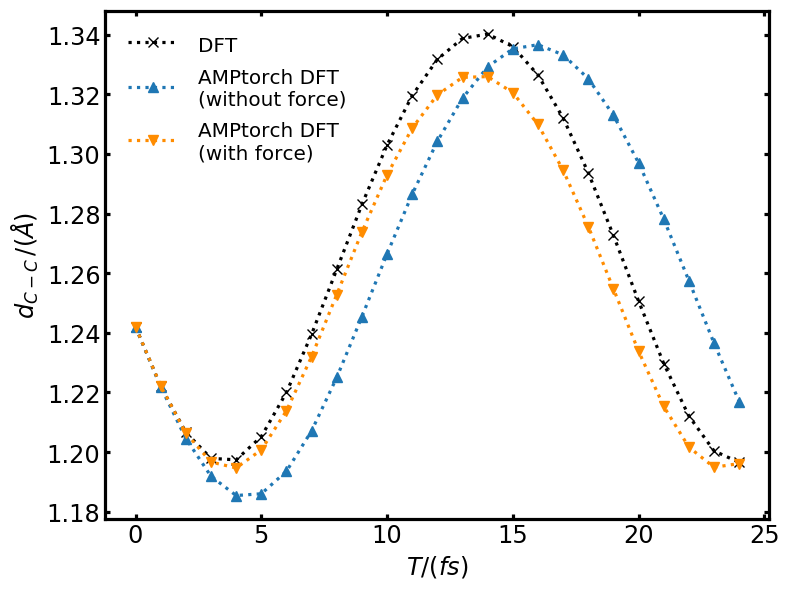

In [73]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 25
ax.plot(time[start:end], distances_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[start:end], distances_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[start:end], distances_amptorch_dft_force[:len(time)][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")


ax.set_xlabel(r"$T/(fs)$")
ax.set_ylabel(r"$d_{C-C}\,/(\AA$)")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), frameon=False, fontsize=18)

ax.legend(loc=0, frameon=False, fontsize=18)

useLargeSize(plt, ax)

### C-C distance v.s. Time

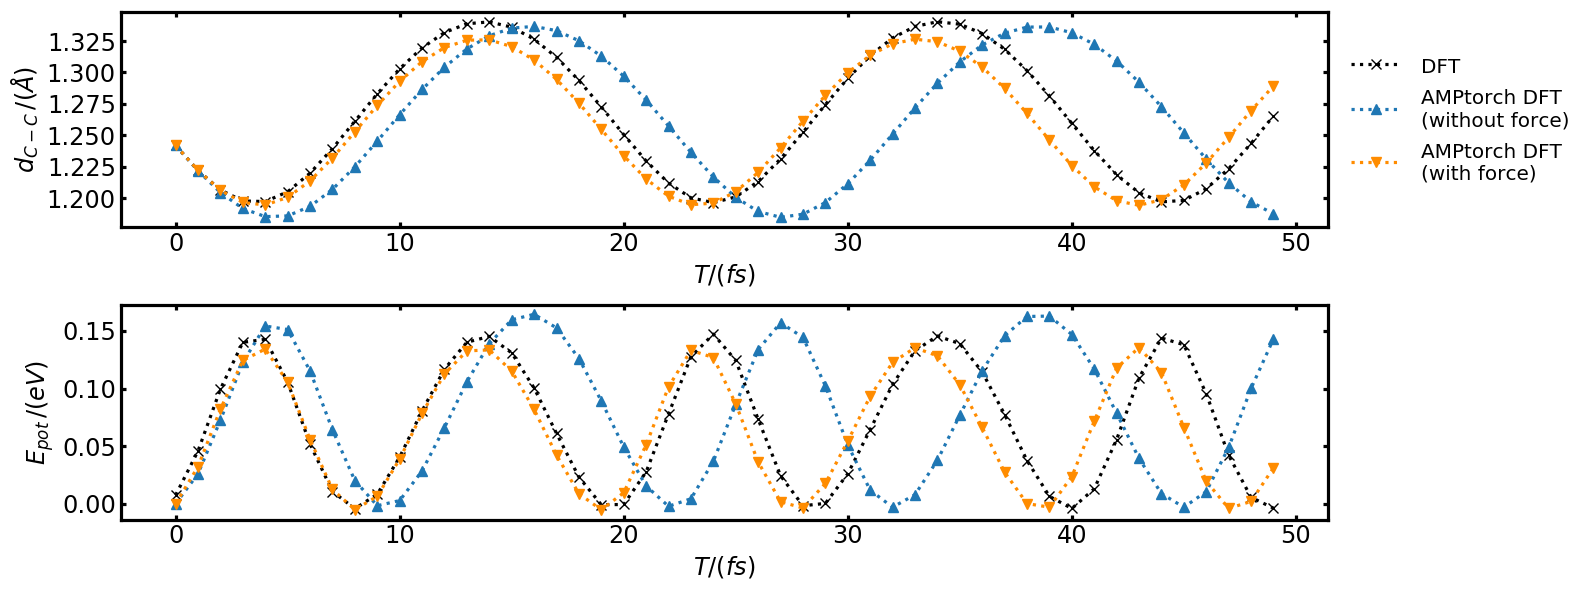

In [74]:
plt.style.use('default')

fig, ax = plt.subplots(2, 1, figsize=(16,6))

start, end = 0, 50
ax[0].plot(time[start:end], distances_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax[0].plot(time[start:end], distances_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax[0].plot(time[start:end], distances_amptorch_dft_force[:len(time)][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")


ax[0].set_xlabel(r"$T/(fs)$")
ax[0].set_ylabel(r"$d_{C-C}\,/(\AA$)")
# ax[0].legend(loc=0, frameon=False, fontsize=18)
ax[0].tick_params(axis="y")
ax[0].yaxis.set_ticks_position("both")
ax[0].xaxis.set_ticks_position("both")

ax[0].legend(loc='center left', bbox_to_anchor=(1., 0.5), frameon=False, fontsize=18)

useLargeSize(plt, ax[0])

ax[1].plot(time[start:end], energies_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax[1].plot(time[start:end], energies_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax[1].plot(time[start:end], energies_amptorch_dft_force[:len(time)][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")

ax[1].set_xlabel(r"$T/(fs)$")
ax[1].set_ylabel(r"$E_{pot}\,/(eV$)")

ax[1].tick_params(axis="y")
ax[1].yaxis.set_ticks_position("both")
ax[1].xaxis.set_ticks_position("both")

useLargeSize(plt, ax[1])

plt.savefig("./figures/c2_nve_dft_comparison.png", dpi=300)

### Epot v.s. Time

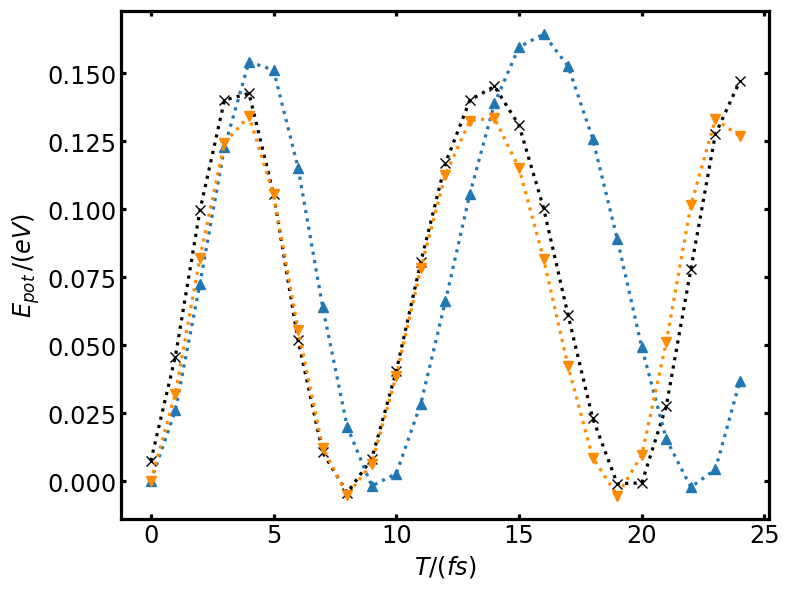

In [75]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 25
ax.plot(time[start:end], energies_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[start:end], energies_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[start:end], energies_amptorch_dft_force[:len(time)][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")

ax.set_xlabel(r"$T/(fs)$")
ax.set_ylabel(r"$E_{pot}\,/(eV$)")

ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), frameon=False, fontsize=18)
# ax.legend(loc=0, frameon=False, fontsize=18)
# ax.set_ylim(-0.01, 0.25)
# ax.set_xlim(0, 30)
useLargeSize(plt, ax)

# ax.legend(loc=(1.01, 0.6), frameon=False, fontsize=18)

plt.savefig("./figures/c2_nve_dft_epot_comparison.png", dpi=300)

### C-C bond distance distribution

1.2719814433096333 1.2622159313375805 1.264270763528586
DFT middle minimum is 1.2666
AMPtorch DFT (without force) middle minimum is 1.2601
AMPtorch DFT (with force) middle minimum is 1.2599


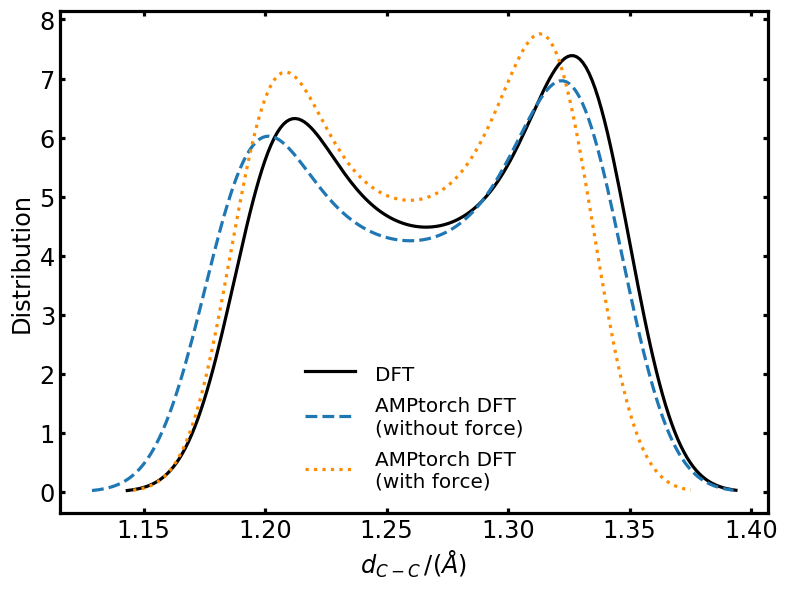

In [78]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(distances_dft, c="k", bw_adjust=1, label="DFT")
sns.kdeplot(distances_amptorch_dft_noforce[:len(time)], bw_adjust=1, c="tab:blue", linestyle="dashed", label="AMPtorch DFT\n(without force)")
sns.kdeplot(distances_amptorch_dft_force[:len(time)], bw_adjust=1, c="darkorange", linestyle="dotted", label="AMPtorch DFT\n(with force)")


ax.set_xlabel(r"$d_{C-C}\,/(\AA$)")
ax.set_ylabel(r"Distribution")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc=0, frameon=False, fontsize=18)

# plt.yticks(fig.get_yticks(), fig.get_yticks() * 100)
# plt.ylabel('Distribution [%]', fontsize=16)

useLargeSize(plt, ax)
plt.savefig("./figures/c2_nve_dft_rdensity_comparison.png", dpi=300)

print(np.mean(distances_dft), np.mean(distances_amptorch_dft_force[:len(time)]), np.mean(distances_amptorch_dft_noforce[:len(time)]))

start, end = 50, 150

x = ax.lines[0].get_xdata()[start:end]
y = ax.lines[0].get_ydata()[start:end]
minid = np.argmin(y)
print("DFT middle minimum is {:.4f}".format(x[minid]))
x = ax.lines[1].get_xdata()[start:end]
y = ax.lines[1].get_ydata()[start:end]
minid = np.argmin(y)
print("AMPtorch DFT (without force) middle minimum is {:.4f}".format(x[minid]))
x = ax.lines[2].get_xdata()[start:end]
y = ax.lines[2].get_ydata()[start:end]
minid = np.argmin(y)
print("AMPtorch DFT (with force) middle minimum is {:.4f}".format(x[minid]))

## NVT comparison between MD calculated by DFT, AMPtorch DFT (with force) and AMPtorch DFT (without force)

In [6]:
dft_file = "./MD_start_eq/dft/nvt/test04_seed1_mpi/md_nvt_dft.traj"
# dft_file = "./MD_start_eq/dft/nvt/test05/md_nvt_dft.traj"
forces_dft = extract_forces(dft_file, nums=1000)
energies_dft = extract_energy(dft_file, nums=1000)
distances_dft = extract_distance(dft_file, 0, 1, nums=1000)

amptorch_dft_force_file = "./MD_start_eq/amptorch_dft/force/nvt/test04/md_nvt_amptorch.traj"
forces_amptorch_dft_force = extract_forces(amptorch_dft_force_file)
energies_amptorch_dft_force = extract_energy(amptorch_dft_force_file)
distances_amptorch_dft_force = extract_distance(amptorch_dft_force_file, 0, 1)

amptorch_dft_noforce_file = "./MD_start_eq/amptorch_dft/noforce/nvt/test04/md_nvt_amptorch.traj"
forces_amptorch_dft_noforce = extract_forces(amptorch_dft_noforce_file)
energies_amptorch_dft_noforce = extract_energy(amptorch_dft_noforce_file)
distances_amptorch_dft_noforce = extract_distance(amptorch_dft_noforce_file, 0, 1)

['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1


In [7]:
print(np.mean(distances_dft))
print(np.mean(distances_amptorch_dft_force))
print(np.mean(distances_amptorch_dft_noforce))

1.2589296889439459
1.2510345803389875
1.2483810769753085


In [65]:
print(len(distances_dft), len(distances_amptorch_dft_force), len(distances_amptorch_dft_noforce))

min_len = min(len(distances_dft), len(distances_amptorch_dft_force), len(distances_amptorch_dft_noforce))

time = np.arange(min_len)

# -299.27967498888864 -299.3607482910156 -299.29071044921875
energies_dft -= -299.27967498888864
energies_amptorch_dft_force -= -299.3607482910156
energies_amptorch_dft_noforce -= -299.29071044921875

120 200 200


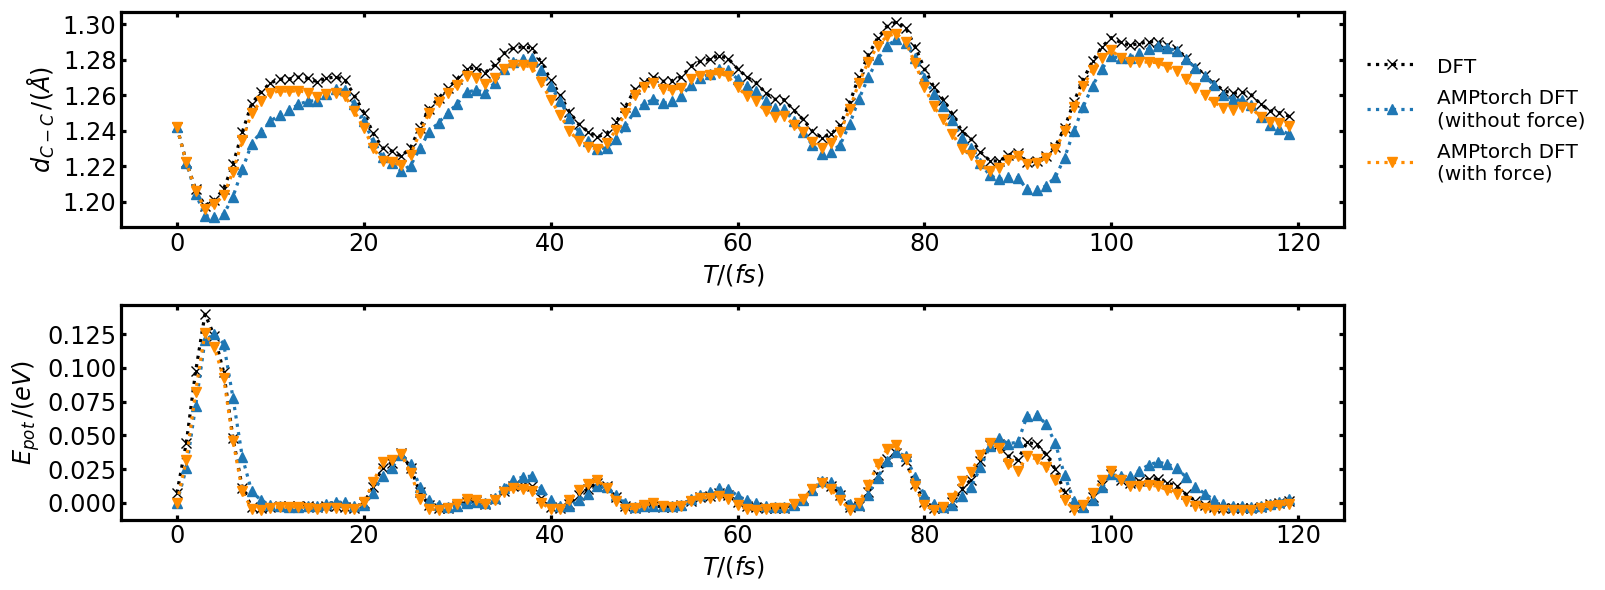

In [67]:
plt.style.use('default')

fig, ax = plt.subplots(2, 1, figsize=(16,6))

start, end = 0, len(time)
ax[0].plot(time[start:end], distances_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax[0].plot(time[start:end], distances_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax[0].plot(time[start:end], distances_amptorch_dft_force[:len(time)][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")


ax[0].set_xlabel(r"$T/(fs)$")
ax[0].set_ylabel(r"$d_{C-C}\,/(\AA$)")
ax[0].tick_params(axis="y")
ax[0].yaxis.set_ticks_position("both")
ax[0].xaxis.set_ticks_position("both")
ax[0].legend(loc='center left', bbox_to_anchor=(1, 0.5), frameon=False, fontsize=18)

useLargeSize(plt, ax[0])

ax[1].plot(time[start:end], energies_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax[1].plot(time[start:end], energies_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax[1].plot(time[start:end], energies_amptorch_dft_force[:len(time)][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")


ax[1].set_xlabel(r"$T/(fs)$")
ax[1].set_ylabel(r"$E_{pot}\,/(eV$)")
ax[1].tick_params(axis="y")
ax[1].yaxis.set_ticks_position("both")
ax[1].xaxis.set_ticks_position("both")

useLargeSize(plt, ax[1])

plt.savefig("./figures/c2_nvt_dft_comparison.png", dpi=300)

### Epot v.s. Time

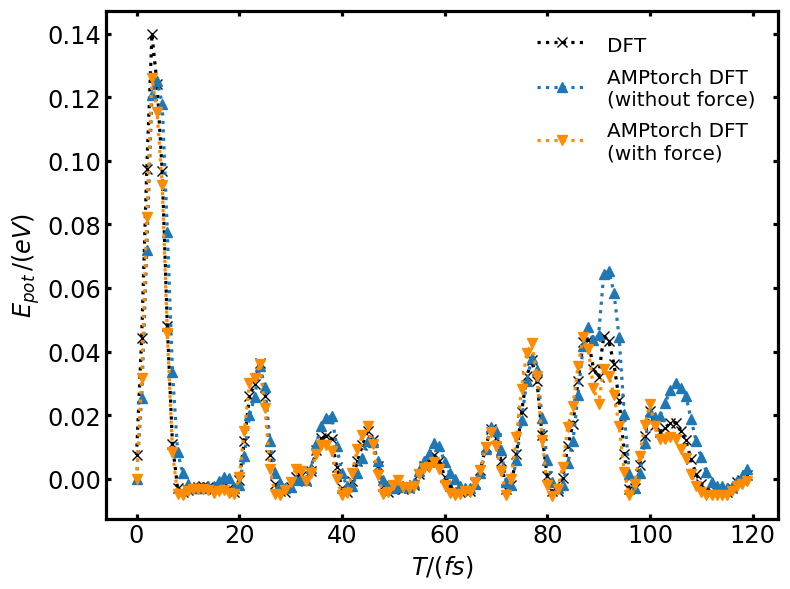

In [28]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, len(time)
ax.plot(time[start:end], energies_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[start:end], energies_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[start:end], energies_amptorch_dft_force[:len(time)][start:end], marker="v", markersize=7, linestyle="dotted", c="darkorange", label="AMPtorch DFT\n(with force)")


ax.set_xlabel(r"$T/(fs)$")
ax.set_ylabel(r"$E_{pot}\,/(eV$)")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), frameon=False, fontsize=18)

useLargeSize(plt, ax)

# ax.legend(loc=(1.01, 0.6), frameon=False, fontsize=18)

plt.savefig("./figures/c2_nvt_dft_epot_comparison.png", dpi=300)

### C-C bond distance distribution

1.2589296889439459 1.25215592213036 1.249969151233228


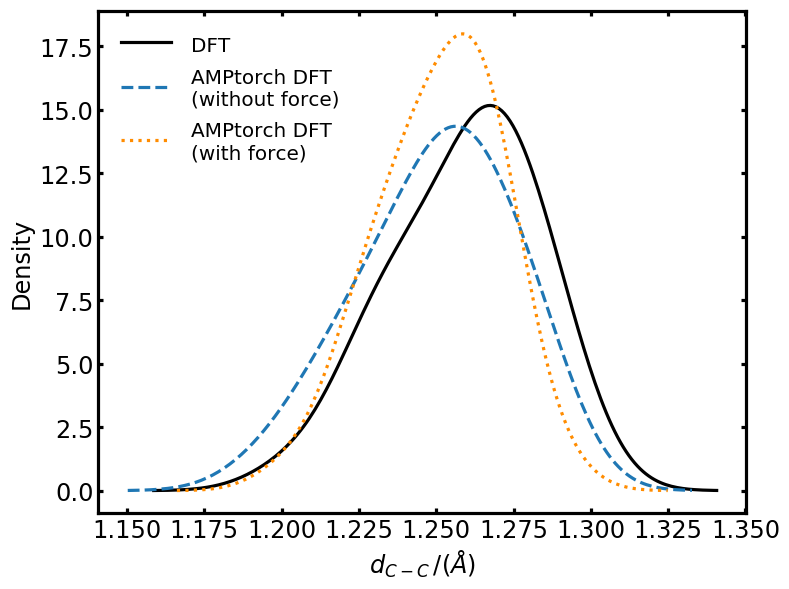

In [29]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(distances_dft, c="k", bw_adjust=1.5, linestyle="solid", label="DFT")
sns.kdeplot(distances_amptorch_dft_noforce[:len(time)], bw_adjust=1.5, c="tab:blue", linestyle="dashed", label="AMPtorch DFT\n(without force)")
sns.kdeplot(distances_amptorch_dft_force, bw_adjust=1.5, c="darkorange", linestyle="dotted", label="AMPtorch DFT\n(with force)")


ax.set_xlabel(r"$d_{C-C}\,/(\AA$)")
ax.set_ylabel(r"Density")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc=0, frameon=False, fontsize=18)

useLargeSize(plt, ax)
plt.savefig("./figures/c2_nvt_dft_rdensity_comparison.png", dpi=300)


print(np.mean(distances_dft), np.mean(distances_amptorch_dft_force[:len(time)]), np.mean(distances_amptorch_dft_noforce[:len(time)]))

['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1


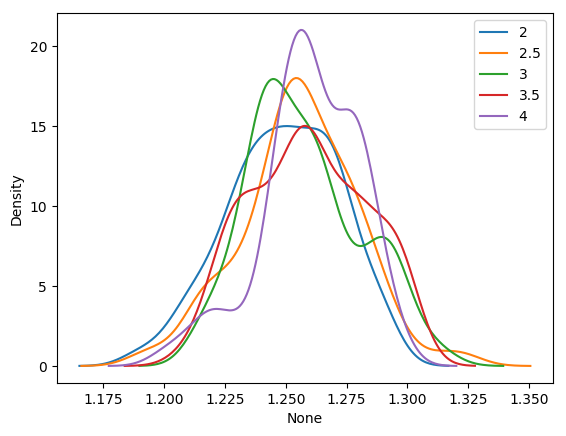

In [284]:
distances = []
for f in [2, 2.5, 3, 3.5, 4]:
    amptorch_dft_noforce_file = "./MD_start_eq/amptorch_dft/noforce/nvt/test03/md_nvt_amptorch_{}.traj".format(f)
    sns.kdeplot(extract_distance(amptorch_dft_noforce_file, 0, 1), bw_adjust=1, linestyle="solid", label="{}".format(f))
plt.legend()

## NVE comparison between MD calculated by DFT, AMPtorch DFT (without force) and AMPtorch DMC

In [3]:
dft_file = "./MD_start_eq/dft/nve/test04/md_nve_dft.traj"
forces_dft = extract_forces(dft_file, nums=1000)
energies_dft = extract_energy(dft_file, nums=1000)
distances_dft = extract_distance(dft_file, 0, 1, nums=1000)

amptorch_dmc_file = "./MD_start_eq/amptorch_dmc/nve/test01/md_nve_amptorch.traj"
forces_amptorch_dmc = extract_forces(amptorch_dmc_file, nums=1000)
energies_amptorch_dmc = extract_energy(amptorch_dmc_file, nums=1000)
distances_amptorch_dmc = extract_distance(amptorch_dmc_file, 0, 1, nums=1000)

amptorch_dft_noforce_file = "./MD_start_eq/amptorch_dft/noforce/nve/test01/md_nve_amptorch.traj"
forces_amptorch_dft_noforce = extract_forces(amptorch_dft_noforce_file, nums=1000)
energies_amptorch_dft_noforce = extract_energy(amptorch_dft_noforce_file, nums=1000)
distances_amptorch_dft_noforce = extract_distance(amptorch_dft_noforce_file, 0, 1, nums=1000)

['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1


In [4]:
print(len(distances_dft), len(distances_amptorch_dmc), len(distances_amptorch_dft_noforce))

min_len = min(len(distances_dft), len(distances_amptorch_dmc), len(distances_amptorch_dft_noforce))

time = np.arange(min_len)

# -299.27967498888864 -299.3607482910156 -299.29071044921875
energies_dft -= -299.27967498888864
energies_amptorch_dmc -= -300.74713134765625
energies_amptorch_dft_noforce -= -299.29071044921875

201 1000 1000


In [6]:
print(np.mean(distances_dft))
print(np.mean(distances_amptorch_dft_noforce))
print(np.mean(distances_amptorch_dmc))

1.2719814433096333
1.2646942871592481
1.2468684307815234


### C-C distance v.s. time

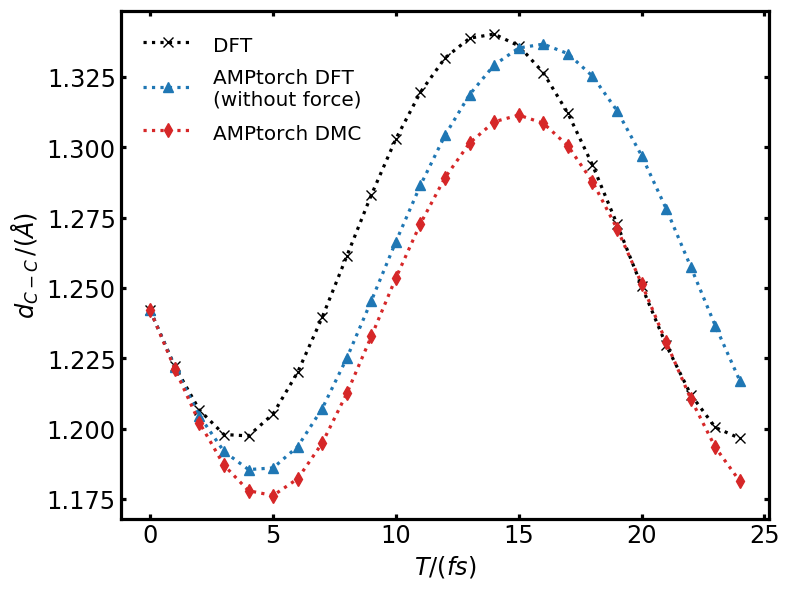

In [5]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 25
ax.plot(time[start:end], distances_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[start:end], distances_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[start:end], distances_amptorch_dmc[:len(time)][start:end], marker="d", markersize=7, linestyle="dotted", c="tab:red", label="AMPtorch DMC")

ax.set_xlabel(r"$T/(fs)$")
ax.set_ylabel(r"$d_{C-C}\,/(\AA$)")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), frameon=False, fontsize=18)

useLargeSize(plt, ax)

# ax.legend(loc=(1.01, 0.6), frameon=False, fontsize=18)

# plt.savefig("./figures/c2_nve_dmc_r_comparison.png", dpi=300)

### Epot v.s. Time

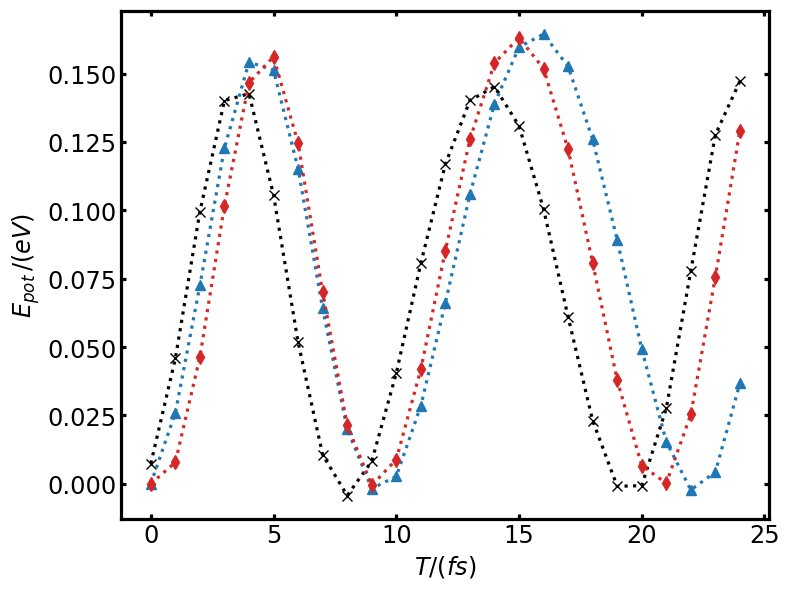

In [17]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 25
ax.plot(time[start:end], energies_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[start:end], energies_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[start:end], energies_amptorch_dmc[:len(time)][start:end], marker="d", markersize=7, linestyle="dotted", c="tab:red", label="AMPtorch DMC")

ax.set_xlabel(r"$T/(fs)$")
ax.set_ylabel(r"$E_{pot}\,/(eV$)")
# ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), frameon=False, fontsize=18)

useLargeSize(plt, ax)

# ax.legend(loc=(1.01, 0.6), frameon=False, fontsize=18)

plt.savefig("./figures/c2_nve_dmc_epot_comparison.png", dpi=300)

### C-C bond distance distribution

1.2719814433096333 1.2462885164132105


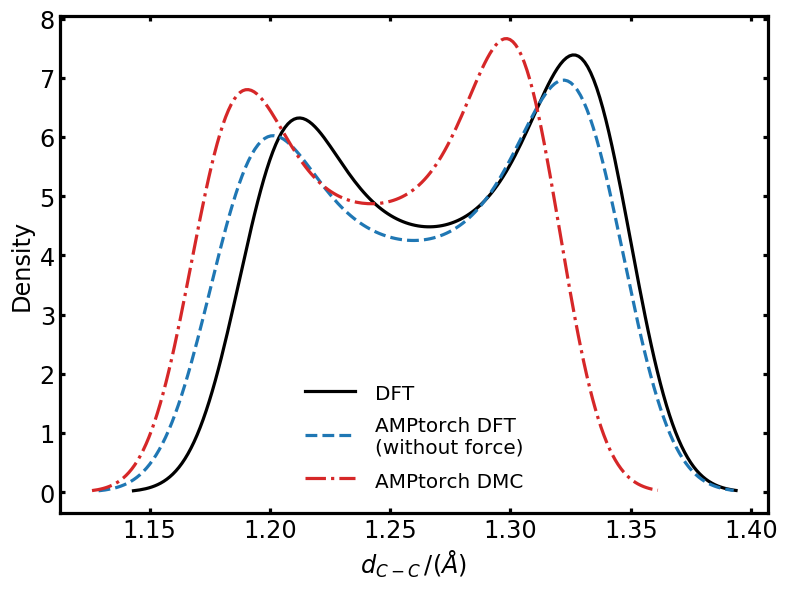

In [18]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(distances_dft, c="k", bw_adjust=1, label="DFT")
sns.kdeplot(distances_amptorch_dft_noforce[:len(time)], bw_adjust=1, c="tab:blue", linestyle="dashed", label="AMPtorch DFT\n(without force)")
sns.kdeplot(distances_amptorch_dmc[:len(time)], bw_adjust=1, c="tab:red", linestyle="dashdot", label="AMPtorch DMC")

ax.set_xlabel(r"$d_{C-C}\,/(\AA$)")
ax.set_ylabel(r"Density")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
# ax.legend(loc=0, frameon=False, fontsize=18)

# plt.yticks(fig.get_yticks(), fig.get_yticks() * 100)
# plt.ylabel('Distribution [%]', fontsize=16)

useLargeSize(plt, ax)
plt.savefig("./figures/c2_nve_dmc_rdensity_comparison.png", dpi=300)

print(np.mean(distances_dft), np.mean(distances_amptorch_dmc[:len(time)]))

## NVT comparison between MD calculated by DFT, AMPtorch DFT (without force) and AMPtorch DMC

In [7]:
dft_file = "./MD_start_eq/dft/nvt/test04_seed1_mpi/md_nvt_dft.traj"
forces_dft = extract_forces(dft_file, nums=1000)
energies_dft = extract_energy(dft_file, nums=1000)
distances_dft = extract_distance(dft_file, 0, 1, nums=1000)

amptorch_dmc_file = "./MD_start_eq/amptorch_dmc/nvt/test02/md_nvt_amptorch.traj"
forces_amptorch_dmc = extract_forces(amptorch_dmc_file, nums=1000)
energies_amptorch_dmc = extract_energy(amptorch_dmc_file, nums=1000)
distances_amptorch_dmc = extract_distance(amptorch_dmc_file, 0, 1, nums=1000)

amptorch_dft_noforce_file = "./MD_start_eq/amptorch_dft/noforce/nvt/test04/md_nvt_amptorch.traj"
forces_amptorch_dft_noforce = extract_forces(amptorch_dft_noforce_file, nums=1000)
energies_amptorch_dft_noforce = extract_energy(amptorch_dft_noforce_file, nums=1000)
distances_amptorch_dft_noforce = extract_distance(amptorch_dft_noforce_file, 0, 1, nums=1000)

['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1
['C', 'C']
Get distance between atom 0 and atom 1


In [8]:
print(len(distances_dft), len(distances_amptorch_dmc), len(distances_amptorch_dft_noforce))

min_len = min(len(distances_dft), len(distances_amptorch_dmc), len(distances_amptorch_dft_noforce))

time = np.arange(min_len)

# -299.27967498888864 -299.3607482910156 -299.29071044921875
energies_dft -= -299.27967498888864
energies_amptorch_dmc -= -300.74713134765625
energies_amptorch_dft_noforce -= -299.29071044921875

120 201 201


In [9]:
print(np.mean(distances_dft))
print(np.mean(distances_amptorch_dft_noforce))
print(np.mean(distances_amptorch_dmc))

1.2589296889439459
1.2481459431493935
1.2334397878100165


### C-C bond distance v.s. Time

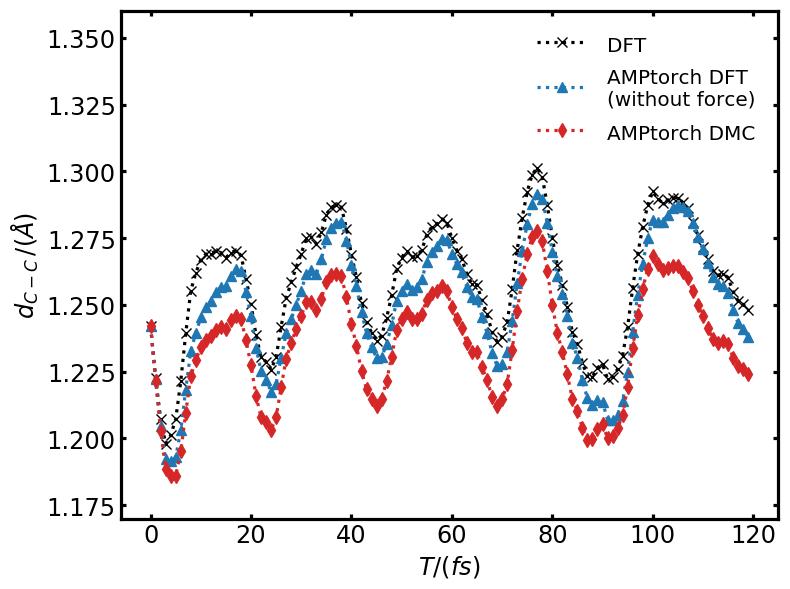

In [32]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 120
ax.plot(time[start:end], distances_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[start:end], distances_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[start:end], distances_amptorch_dmc[:len(time)][start:end], marker="d", markersize=7, linestyle="dotted", c="tab:red", label="AMPtorch DMC")

ax.set_xlabel(r"$T/(fs)$")
ax.set_ylabel(r"$d_{C-C}\,/(\AA$)")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), frameon=False, fontsize=18)
ax.set_ylim(1.17, 1.36)
useLargeSize(plt, ax)

# ax.legend(loc=(1.01, 0.6), frameon=False, fontsize=18)

plt.savefig("./figures/c2_nvt_dmc_r_comparison.png", dpi=300)

### Epot v.s. Time

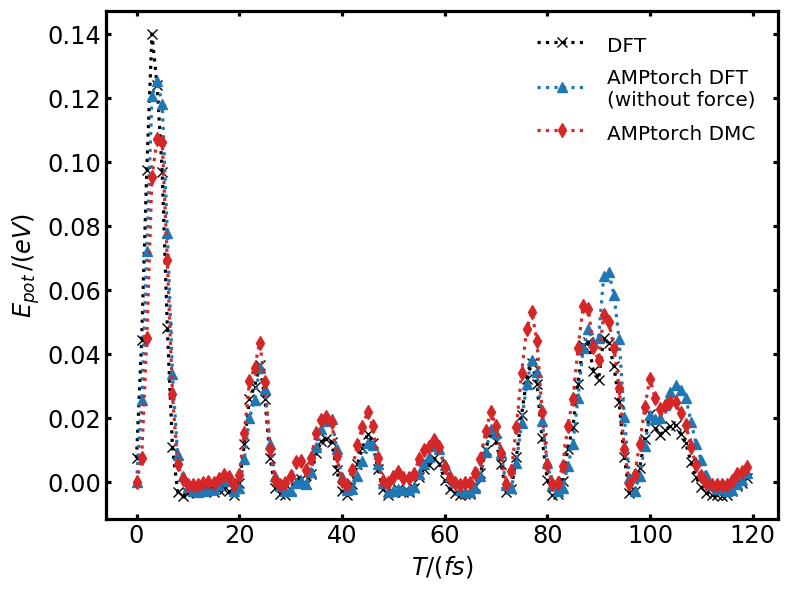

In [33]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

start, end = 0, 120
ax.plot(time[start:end], energies_dft[start:end], marker="x", linestyle="dotted", markersize=7, c="k", label="DFT")
ax.plot(time[start:end], energies_amptorch_dft_noforce[:len(time)][start:end], marker="^", markersize=7, linestyle="dotted", c="tab:blue", label="AMPtorch DFT\n(without force)")
ax.plot(time[start:end], energies_amptorch_dmc[:len(time)][start:end], marker="d", markersize=7, linestyle="dotted", c="tab:red", label="AMPtorch DMC")

ax.set_xlabel(r"$T/(fs)$")
ax.set_ylabel(r"$E_{pot}\,/(eV$)")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
# ax.legend(loc='center left', bbox_to_anchor=(1, 0.8), frameon=False, fontsize=18)

useLargeSize(plt, ax)

# ax.legend(loc=(1.01, 0.6), frameon=False, fontsize=18)

plt.savefig("./figures/c2_nvt_dmc_epot_comparison.png", dpi=300)

### C-C bond distance distribution

1.2589296889439459 1.235009808434372


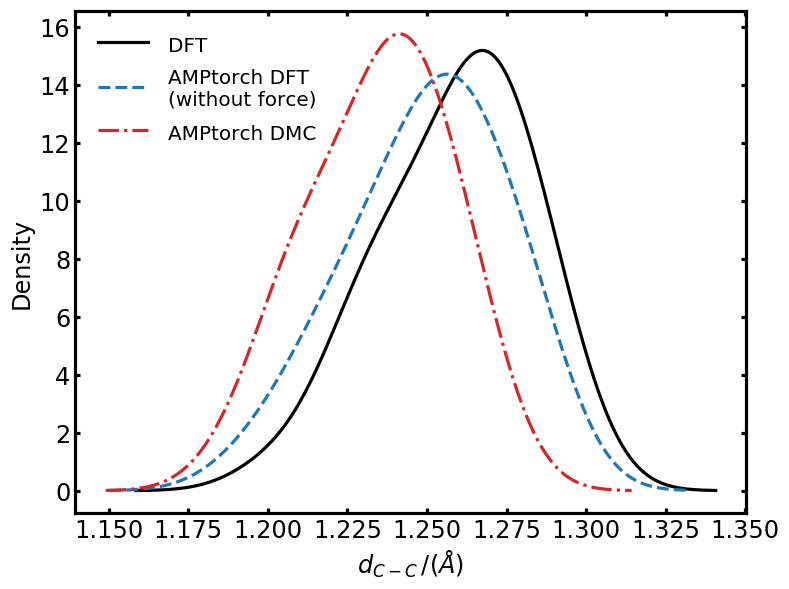

In [34]:
plt.style.use('default')

fig, ax = plt.subplots(figsize=(8,6))

sns.kdeplot(distances_dft, c="k", bw_adjust=1.5, label="DFT")
sns.kdeplot(distances_amptorch_dft_noforce[:len(time)], bw_adjust=1.5, c="tab:blue", linestyle="dashed", label="AMPtorch DFT\n(without force)")
sns.kdeplot(distances_amptorch_dmc[:len(time)], bw_adjust=1.5, c="tab:red", linestyle="dashdot", label="AMPtorch DMC")


ax.set_xlabel(r"$d_{C-C}\,/(\AA$)")
ax.set_ylabel(r"Density")
ax.legend(loc=0, frameon=False, fontsize=18)
ax.tick_params(axis="y")
ax.yaxis.set_ticks_position("both")
ax.xaxis.set_ticks_position("both")
ax.legend(loc=0, frameon=False, fontsize=18)

# plt.yticks(fig.get_yticks(), fig.get_yticks() * 100)
# plt.ylabel('Distribution [%]', fontsize=16)

useLargeSize(plt, ax)
print(np.mean(distances_dft), np.mean(distances_amptorch_dmc[:len(time)]))
plt.savefig("./figures/c2_nvt_dmc_rdensity_comparison.png", dpi=300)